In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

### **Importing data**

In [0]:
path = '/content/drive/My Drive/Team 2 BI/Meet/Fake_News/train.csv'
train_data = pd.read_csv(path)

In [4]:
train_data.shape

(20800, 5)

In [0]:
path = '/content/drive/My Drive/test.csv'
test_data = pd.read_csv(path)

In [6]:
test_data.shape

(5200, 4)

### **Data Preprocessing**

In [7]:
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
test_data.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [9]:
train_data[['title' , 'author']] = train_data[['title' , 'author']].fillna(value = 'Missing')
train_data = train_data.dropna()
train_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
test_data[['title' , 'author']] = test_data[['title' , 'author']].fillna(value = 'Missing')
test_data = train_data.dropna()
test_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
length = []
[length.append(len(str(text))) for text in train_data['text']]
train_data['length'] = length
train_data.head()

,id,title,author,text,label,length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


In [12]:
length = []
[length.append(len(str(text))) for text in test_data['text']]
test_data['length'] = length
test_data.head()

,id,title,author,text,label,length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


In [13]:
len(train_data[train_data['length'] < 50])

207

In [14]:
len(test_data[test_data['length'] < 50])

207

In [15]:
train_data['text'][train_data['length'] < 50]

82                                                   
169                                                  
173                                   Guest   Guest  
196            They got the heater turned up on high.
295                                                  
                             ...                     
20350                         I hope nobody got hurt!
20418                                 Guest   Guest  
20431    \nOctober 28, 2016 The Mothers by stclair by
20513                                                
20636                              Trump all the way!
Name: text, Length: 207, dtype: object

### **Removing Outliers**

In [0]:
train_data = train_data.drop(train_data['text'][train_data['length'] < 50].index, axis = 0)

In [0]:
test_data = test_data.drop(test_data['text'][test_data['length'] < 50].index, axis = 0)

In [0]:
train_data = train_data.apply(lambda x: x.astype(str).str.lower())


### **Tokenization**

In [0]:
train_data['title'] = train_data['title'].str.replace('[^\w\s]','')
train_data['title'] = train_data['title'].str.replace('<.*?>','')
train_data['text'] = train_data['text'].str.replace('[^\w\s]','')
train_data['text'] = train_data['text'].str.replace('<.*?>','')

In [20]:
import tensorflow as tf
from keras.preprocessing.text import text_to_word_sequence

Using TensorFlow backend.


In [0]:
tokens = []
[tokens.append(text_to_word_sequence(text)) for text in train_data['text']]
train_data['tokens_text'] = tokens


In [0]:
tokens = []
[tokens.append(text_to_word_sequence(text)) for text in train_data['title']]
train_data['tokens_title'] = tokens


In [23]:
train_data[['tokens_title' , 'tokens_text']]

,tokens_title,tokens_text
0,"[house, dem, aide, we, didnt, even, see, comey...","[house, dem, aide, we, didnt, even, see, comey..."
1,"[flynn, hillary, clinton, big, woman, on, camp...","[ever, get, the, feeling, your, life, circles,..."
2,"[why, the, truth, might, get, you, fired]","[why, the, truth, might, get, you, fired, octo..."
3,"[15, civilians, killed, in, single, us, airstr...","[videos, 15, civilians, killed, in, single, us..."
4,"[iranian, woman, jailed, for, fictional, unpub...","[print, an, iranian, woman, has, been, sentenc..."
...,...,...
20795,"[rapper, ti, trump, a, poster, child, for, whi...","[rapper, t, i, unloaded, on, black, celebritie..."
20796,"[nfl, playoffs, schedule, matchups, and, odds,...","[when, the, green, bay, packers, lost, to, the..."
20797,"[macys, is, said, to, receive, takeover, appro...","[the, macys, of, today, grew, from, the, union..."
20798,"[nato, russia, to, hold, parallel, exercises, ...","[nato, russia, to, hold, parallel, exercises, ..."


### **Removing Stopword**

In [24]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

def remove_stops(row):
  my_list = row['tokens_title']
  final_text = [w for w in my_list if not w in stops]
  return(final_text)

train_data['title'] = train_data.apply(remove_stops, axis = 1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

def remove_stops(row):
  my_list = row['tokens_text']
  final_text = [w for w in my_list if not w in stops]
  return(final_text)

train_data['text'] = train_data.apply(remove_stops, axis = 1)

In [0]:
def rejoin_words(row):
  my_list = row['text']
  joined_words = ( " ".join(my_list))
  return joined_words

train_data['text'] = train_data.apply(rejoin_words, axis = 1)

In [0]:
def rejoin_words(row):
  my_list = row['title']
  joined_words = ( " ".join(my_list))
  return joined_words

train_data['title'] = train_data.apply(rejoin_words, axis = 1)

In [28]:
train_data[['title' , 'text']]

,title,text
0,house dem aide didnt even see comeys letter ja...,house dem aide didnt even see comeys letter ja...
1,flynn hillary clinton big woman campus breitbart,ever get feeling life circles roundabout rathe...
2,truth might get fired,truth might get fired october 29 2016 tension ...
3,15 civilians killed single us airstrike identi...,videos 15 civilians killed single us airstrike...
4,iranian woman jailed fictional unpublished sto...,print iranian woman sentenced six years prison...
...,...,...
20795,rapper ti trump poster child white supremacy,rapper unloaded black celebrities met donald t...
20796,nfl playoffs schedule matchups odds new york t...,green bay packers lost washington redskins wee...
20797,macys said receive takeover approach hudsons b...,macys today grew union several great names ame...
20798,nato russia hold parallel exercises balkans,nato russia hold parallel exercises balkans 11...


In [0]:
max_features = 4500

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words = max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower = True, split = ' ')
tokenizer.fit_on_texts(texts = train_data['text'])
X = tokenizer.texts_to_sequences(texts = train_data['text'])

In [0]:
word_index = tokenizer.word_index

### **Padding**

In [0]:
X = pad_sequences(sequences = X, maxlen = 1000, padding = 'pre')

In [34]:
from keras.utils.np_utils import to_categorical
import numpy as np

print(X.shape)
y = to_categorical(np.asarray(train_data['label'].values), num_classes = 2)
print(y.shape)

(20554, 1000)
(20554, 2)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
x_test, x_val, y_test, y_val = train_test_split( X, y, test_size=0.50, random_state=42)

In [0]:
# print(np.any(np.isnan(X_test)))
# # print(np.any(np.isnan(y_test)))

### **GloVe Model**

In [37]:
import os
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

MAX_SEQUENCE_LENGTH = 1000
GLOVE_DIR = '/content/drive/My Drive/glove.6B.100d.txt' 
EMBEDDING_DIM = 100
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR), encoding="utf8")
for line in f:
    values = line.split()
    #print(values[1:])
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove.' % len(embeddings_index))

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH)

Total 400000 word vectors in Glove.


### **LSTM**

In [38]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

model = Sequential()
model.add(Embedding(len(word_index)+1 , EMBEDDING_DIM , weights = [embedding_matrix], input_length = MAX_SEQUENCE_LENGTH, trainable = False))
# model.add(LSTM(128))
model.add(LSTM(64))

# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()
history_lstm = model.fit(X_train, y_train, validation_data = (x_val, y_val), epochs = 5, batch_size = 64)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 100)         21356200  
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 21,400,586
Trainable params: 44,386
Non-trainable params: 21,356,200
_________________________________________________________________
Train on 16443 samples, validate on 10277 samples
Epoch 1/5
16443/16443 [==============================] - 245s 15ms/step - loss: 0.4121 - accuracy: 0.8124 - val_loss: 0.3069 - val_accuracy: 0.8728
Epoch 2/5
16443/16443 [==============

In [39]:
test_preds = model.predict(X_train)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_train)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_train))
print("Accuracy of model1: ", correct_predictions/float(len(y_train)))

Correct predictions: 15793.0
Total number of test examples: 16443
Accuracy of model1:  0.9604695006993857


In [40]:
test_preds = model.predict(x_test)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model1: ", correct_predictions/float(len(y_test)))

Correct predictions: 9864.0
Total number of test examples: 10277
Accuracy of model1:  0.959813175051085


### **Deep CNN**

In [43]:
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Dropout
from keras.models import Model

convs = []
filter_sizes = [3,4,5]

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

for fsz in filter_sizes:
    l_conv = Conv1D(nb_filter=64,filter_length=fsz,activation='relu')(embedded_sequences)
    l_pool = MaxPooling1D(5)(l_conv)
    convs.append(l_pool)
  

# model.add()
# model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
# model.add(MaxPooling(5))
# model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
# model.add(MaxPooling1D(30))
# model.add(Flatten())
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(32, activation = 'relu'))
# model.add(Dense(2, activation = 'softmax'))
#l_merge = Merge(mode='concat', concat_axis=1)(convs)
l_conv1 = Conv1D(filters=256, kernel_size=5, activation='relu')(l_pool)
l_pool1 = MaxPooling1D(pool_size = 2)(l_conv1)

l_conv2 = Conv1D(filters=256, kernel_size=5, activation='relu')(l_pool1)

l_drop1 = Dropout(0.2)(l_conv2) 

l_pool2 = MaxPooling1D(pool_size = 2)(l_conv2)
l_conv3 = Conv1D(filters = 128, kernel_size = 5, activation = 'relu')(l_pool2)

l_drop2 = Dropout(0.2)(l_conv3)

# l_pool3 = MaxPooling1D(pool_size = 2)(l_conv3)
# l_conv4 = Conv1D(filters = 256, kernel_size = 5, activation = 'relu')(l_pool3)

# l_drop3 = Dropout(0.2)(l_conv4)

# l_pool4 = MaxPooling1D(pool_size = 2)(l_conv4)
# l_conv5 = Conv1D(filters = 256, kernel_size= 5, activation = 'relu')(l_pool4)

# l_drop4 = Dropout(0.2)(l_conv5)

l_pool5 = MaxPooling1D(pool_size = 2)(l_conv3)
l_flat = Flatten()(l_pool5)
# l_dense1 = Dense(1024, activation='relu')(l_flat)
# l_dense2 = Dense(512, activation ='relu')(l_dense1)
# l_dense3 = Dense(256, activation ='relu')(l_dense2)
l_dense4 = Dense(128, activation = 'relu')(l_flat)
l_dense5 = Dense(64, activation = 'relu')(l_dense4)
l_dense6 = Dense(32, activation = 'relu')(l_dense5)
preds = Dense(2, activation='softmax')(l_dense6)

model2 = Model(sequence_input, preds)
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print("Fitting a more complex convolutional neural network model")
model2.summary()
history_deepcnn = model2.fit(X_train, y_train, validation_data=(x_val, y_val),
          epochs=5, batch_size=256)
model.save('model.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=3)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=4)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=5)`
  if sys.path[0] == '':


Fitting a more complex convolutional neural network model
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 100)         21356200  
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 996, 64)           32064     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 199, 64)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 195, 256)          82176     
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 97, 256)           0         
_________________________________________________________________
c

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 16443 samples, validate on 10277 samples
Epoch 1/5
16443/16443 [==============================] - 238s 14ms/step - loss: 0.5472 - accuracy: 0.7067 - val_loss: 0.3268 - val_accuracy: 0.8607
Epoch 2/5
16443/16443 [==============================] - 237s 14ms/step - loss: 0.2441 - accuracy: 0.9006 - val_loss: 0.1846 - val_accuracy: 0.9280
Epoch 3/5
16443/16443 [==============================] - 238s 14ms/step - loss: 0.1319 - accuracy: 0.9529 - val_loss: 0.1200 - val_accuracy: 0.9589
Epoch 4/5
16443/16443 [==============================] - 240s 15ms/step - loss: 0.0926 - accuracy: 0.9697 - val_loss: 0.1293 - val_accuracy: 0.9516
Epoch 5/5
16443/16443 [==============================] - 234s 14ms/step - loss: 0.0551 - accuracy: 0.9830 - val_loss: 0.0682 - val_accuracy: 0.9789


In [44]:
test_preds = model2.predict(X_train)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_train)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_train))
print("Accuracy of model1: ", correct_predictions/float(len(y_train)))

Correct predictions: 16329.0
Total number of test examples: 16443
Accuracy of model1:  0.9930669585841999


In [45]:
test_preds = model.predict(x_test)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model1: ", correct_predictions/float(len(y_test)))

Correct predictions: 9864.0
Total number of test examples: 10277
Accuracy of model1:  0.959813175051085


### **CNN**

In [47]:
convs = []
filter_sizes = [3,4,5]

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

for fsz in filter_sizes:
    l_conv = Conv1D(nb_filter=128,filter_length=fsz,activation='relu')(embedded_sequences)
    l_pool = MaxPooling1D(5)(l_conv)
    convs.append(l_pool)
    
# l_merge = Merge(mode='concat', concat_axis=1)(convs)
l_cov1= Conv1D(filters=128, kernel_size=5, activation='relu')(l_pool)
l_pool1 = MaxPooling1D(5)(l_cov1)
l_cov2 = Conv1D(filters=128, kernel_size=5, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(30)(l_cov2)
l_flat = Flatten()(l_pool2)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(2, activation='softmax')(l_dense)

model2_256 = Model(sequence_input, preds)
model2_256.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

print("Fitting a more complex convolutional neural network model")
model2_256.summary()
history_cnn = model2_256.fit(X_train, y_train, validation_data=(x_val, y_val),
          epochs=5, batch_size=128)
model2_256.save('model.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`
  


Fitting a more complex convolutional neural network model
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 100)         21356200  
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 996, 128)          64128     
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 199, 128)          0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 39, 128)           0         
_________________________________________________________________
c

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 16443 samples, validate on 10277 samples
Epoch 1/5
16443/16443 [==============================] - 232s 14ms/step - loss: 0.5650 - accuracy: 0.7211 - val_loss: 0.3251 - val_accuracy: 0.8676
Epoch 2/5
16443/16443 [==============================] - 228s 14ms/step - loss: 0.2956 - accuracy: 0.8740 - val_loss: 0.2517 - val_accuracy: 0.8956
Epoch 3/5
16443/16443 [==============================] - 226s 14ms/step - loss: 0.2428 - accuracy: 0.8958 - val_loss: 0.2326 - val_accuracy: 0.9022
Epoch 4/5
16443/16443 [==============================] - 230s 14ms/step - loss: 0.2221 - accuracy: 0.9042 - val_loss: 0.3751 - val_accuracy: 0.8539
Epoch 5/5
16443/16443 [==============================] - 229s 14ms/step - loss: 0.2067 - accuracy: 0.9114 - val_loss: 0.2339 - val_accuracy: 0.9013


In [48]:
test_preds = model2_256.predict(X_train)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_train)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_train))
print("Accuracy of model1: ", correct_predictions/float(len(y_train)))

Correct predictions: 15020.0
Total number of test examples: 16443
Accuracy of model1:  0.9134586146080399


In [49]:
test_preds = model2_256.predict(x_test)
test_preds = np.round(test_preds)
correct_predictions = float(sum(test_preds == y_test)[0])
print("Correct predictions:", correct_predictions)
print("Total number of test examples:", len(y_test))
print("Accuracy of model1: ", correct_predictions/float(len(y_test)))

Correct predictions: 9399.0
Total number of test examples: 10277
Accuracy of model1:  0.9145665077357206


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


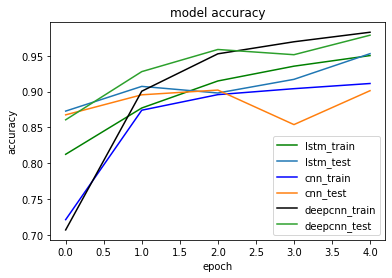

In [55]:

import matplotlib.pyplot as plt
%matplotlib inline 
# list all data in history
print(history_lstm.history.keys())
print(history_cnn.history.keys())
print(history_deepcnn.history.keys())




plt.plot(history_lstm.history['accuracy'], color = 'green')
plt.plot(history_lstm.history['val_accuracy'])


plt.plot(history_cnn.history['accuracy'], color = 'blue')
plt.plot(history_cnn.history['val_accuracy'])


plt.plot(history_deepcnn.history['accuracy'], color = 'black')
plt.plot(history_deepcnn.history['val_accuracy'])




plt.legend(['lstm_train'  , 'lstm_test', 'cnn_train', 'cnn_test' , 'deepcnn_train', 'deepcnn_test'])


plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

In [0]:
# model.compile(optimizer = 'rmsprop' , loss = 'binary_crossentropy', metrics = ['accuracy'])
# history = model.fit(x_train, y_train, epochs = 3, batch_size = 32, validation_data= (x_val, y_val))


In [0]:
# # import tensorflow as tf
# # from tensorflow.keras.preprocessing.text import Tokenizer
# # from tensorflow.keras.preprocessing.sequence import pad_sequences
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D, add
# # from keras.models import Model
# # from keras.layers import Dense, Embedding, LSTM, GRU

# from keras.layers import Embedding
# from keras.layers import Dense, Input, Flatten
# from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
# from keras.models import Model

# import tensorflow
# print(tensorflow.__version__)

# import keras
# print(keras.__version__)

In [0]:
# # LSTM Neural Network
# lstm_model = Sequential(name = 'lstm_nn_model')
# lstm_model.add(layer = Embedding(input_dim = max_features, output_dim = 120, name = '1st_layer'))
# lstm_model.add(layer = LSTM(units = 120, dropout = 0.2, recurrent_dropout = 0.2, name = '2nd_layer'))
# lstm_model.add(layer = Dropout(rate = 0.5, name = '3rd_layer'))
# lstm_model.add(layer = Dense(units = 120,  activation = 'relu', name = '4th_layer'))
# lstm_model.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
# lstm_model.add(layer = Dense(units = len(set(y)),  activation = 'sigmoid', name = 'output_layer'))
# # compiling the model
# lstm_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# lstm_model_fit = lstm_model.fit(X_train, y_train, epochs = 1)

In [0]:
# # model = Sequential()
# # model.add(Embedding(len(tokenizer.word_index)+1 , 100 , weights = [embedding_matrix], input_length = 1000, trainable = False))
# # model.add(LSTM(75))
# # model.add(Dense(32, activation = 'relu'))
# # model.add(Dense(2, activation = 'softmax'))
# # model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# # model.summary
# # history = model.fit(X_train, y_train, validation_data = (x_val, y_val), epochs = 3, batch_size = 32)

# # sequence_input = Input(shape = (1000,), dtype = 'int32')
# # embedded_sequences = embedding_layer(sequence_input)
# lstm_model = Sequential(name = 'lstm_nn_model')

# lstm_model.add(layer = Embedding(len(tokenizer.word_index)+1 , 100 , weights = [embedding_matrix], input_length = 1000, trainable = False))
# lstm_model.add(layer = LSTM(units = 64, dropout = 0.2, recurrent_dropout=0.2, name = '2nd layer'))
# lstm_model.add(layer = Dropout(rate = 0.5, name = '3rd layer'))
# lstm_model.add(layer = Dense(units = 32, activation = 'relu', name = '4th layer'))
# lstm_model.add(layer = Dropout(rate = 0.5 , name = '5th layer'))
# lstm_model.add(layer = Dense(units = len(set(y)), activation = 'sigmoid', name = 'output layer')

# lstm_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


# lstm_model_fit = lstm_model.fit(X_train , y_train, validation_data= (x_val, y_val), epochs = 3, batch_size = 32)

# #
# # sequence_input = Input(shape=(1000,), dtype='int32')
# # embedded_sequences = embedding_layer(sequence_input)
# # l_1= LSTM(256, activation = 'relu')
# # l_2 = Dense(128, activation='relu')(l_1)
# # preds = Dense(2,activation='softmax')(l_2)
# # # l_pool2 = MaxPooling1D(5)(l_cov2)
# # # l_cov3 = Conv1D(64, 5, activation='relu')(l_pool2)
# # # l_pool3 = MaxPooling1D(35)(l_cov3)  # global max pooling
# # # l_flat = Flatten()(l_pool3)
# # # l_dense = Dense(64, activation='relu')(l_flat)
# # # preds = Dense(2, activation='softmax')(l_dense)

# # model = Model(sequence_input, preds)
# # model.compile(loss='binary_crossentropy',
# #               optimizer='adam',
# #               metrics=['accuracy'])

# # history = model.fit(X_train, y_train, validation_data=(x_val, y_val),
# #           epochs=3, batch_size=128)


# # model = Sequential()
# # model.add()

In [0]:
# lstm_model_fit = lstm_model.fit(X_train, y_train, epochs = 3)